<a href="https://colab.research.google.com/github/KILjungjoon/Language-Statistics/blob/main/%EC%84%B8_%EA%B3%B3%EC%9D%98_%EC%BB%B4%ED%93%A8%ED%84%B0_%EC%84%B1%EB%8A%A5_%EB%B9%84%EA%B5%90_t_test%EC%99%80_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코드 설명
* 앞에서는 컴퓨터 2대의 성능을 테스트했습니다.
* 하는 김에 집의 컴퓨터로 같은 프로그램을 실행시켜 3대의 컴퓨터의 성능을 비교해 보겠습니다.
* 컴퓨터는 각각 A:연구실 B:도서관 C:집 입니다.

## 통계 검증하기
* scipy의 one-way ANOVA를 사용하여 세 그룹의 평균 차이에 통계적 유의성이 있는지 확인

In [ ]:
import numpy as np
from scipy.stats import f_oneway

# 데이터
data_A = [(209, 41), (385, 46), (440, 58)]
data_B = [(222, 55), (186, 40), (129, 33)]
data_C = [(2470, 57), (2340, 54), (784, 49), (691, 54), (463, 52), (313, 52)]

# KB당 소요 시간 계산
time_per_kb_A = [time / kb for kb, time in data_A]
time_per_kb_B = [time / kb for kb, time in data_B]
time_per_kb_C = [time / kb for kb, time in data_C]

# ANOVA 수행
f_value, p_value = f_oneway(time_per_kb_A, time_per_kb_B, time_per_kb_C)

# 결과 출력
if p_value < 0.05:
    print("컴퓨터 A, B, C의 성능에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("컴퓨터 A, B, C의 성능에는 통계적으로 유의미한 차이가 없습니다.")

컴퓨터 A, B, C의 성능에는 통계적으로 유의미한 차이가 있습니다.


In [ ]:
# p-value가 0.05보다 작으므로 영가설을 기각하고 3대의 컴퓨터는 차이가 있다고 볼 수 있다.
p_value

0.0027016749553906293

## 성능이 가장 우수한 컴퓨터는?

In [ ]:
# 평균 KB당 소요 시간 계산
mean_time_per_kb_A = np.mean(time_per_kb_A)
mean_time_per_kb_B = np.mean(time_per_kb_B)
mean_time_per_kb_C = np.mean(time_per_kb_C)

# 가장 성능이 우수한 컴퓨터 찾기
performance = {
    'A': mean_time_per_kb_A,
    'B': mean_time_per_kb_B,
    'C': mean_time_per_kb_C,
}
best_computer = min(performance, key=performance.get)

# 결과 출력
print(f"컴퓨터 A의 평균 KB당 소요 시간: {mean_time_per_kb_A:.2f}초")
print(f"컴퓨터 B의 평균 KB당 소요 시간: {mean_time_per_kb_B:.2f}초")
print(f"컴퓨터 C의 평균 KB당 소요 시간: {mean_time_per_kb_C:.2f}초")
print(f"따라서, 가장 성능이 우수한 컴퓨터는 컴퓨터 {best_computer}입니다.")

컴퓨터 A의 평균 KB당 소요 시간: 0.15초
컴퓨터 B의 평균 KB당 소요 시간: 0.24초
컴퓨터 C의 평균 KB당 소요 시간: 0.08초
따라서, 가장 성능이 우수한 컴퓨터는 컴퓨터 C입니다.


## 3종 컴퓨터의 성능 시각화
* 선형회귀 그래프는 C 컴퓨터가 시간당 처리 용량이 더 우수하다는 것을 보여줍니다.
* 다만, 표본 데이터가 적고 C의 데이터가 더 많기 때문에 절대적 비교로 해석할 수는 없습니다.

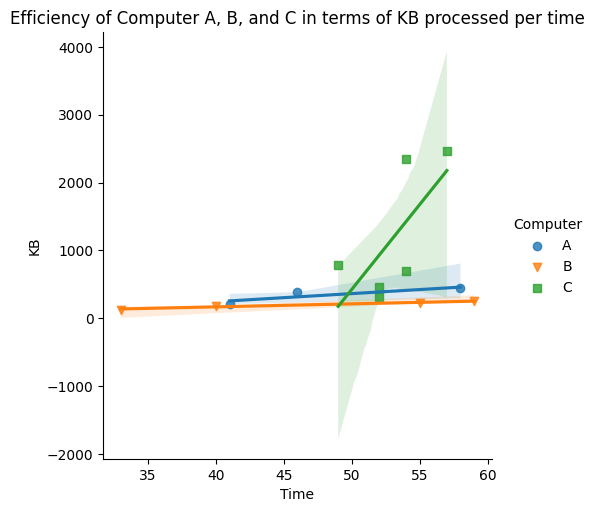

In [ ]:
import seaborn as sns
import pandas as pd

# 데이터 정의
data = {
    'Computer': ['A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C'],
    'KB': [209, 385, 440, 222, 186, 129, 261, 2470, 2340, 784, 691, 463, 313],
    'Time': [41, 46, 58, 55, 40, 33, 59, 57, 54, 49, 54, 52, 52]
}

df = pd.DataFrame(data)

# Seaborn을 이용한 scatter plot과 선형회귀선 그리기
sns.lmplot(x='Time', y='KB', data=df, hue='Computer', markers=['o', 'v', 's'])

plt.title('Efficiency of Computer A, B, and C in terms of KB processed per time')
plt.show()